In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

import cooler
import bioframe
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
import csv
import pyBigWig


In [2]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


In [3]:
jets = bioframe.read_table('/home/kimj50/cohesin_paper/jets_call/jetcall_v5_w30kb.bed',schema='bed6')

jets['chrom'] = 'chr' + jets['chrom'] ### jets


In [4]:
# smc3
smc3_ctr = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_CA1200_1hrauxin_avg_JK165_JK166_chip_summits.bed',schema='bed6')
smc3_jk06 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK06_1hrauxin_avg_JK167_JK185_chip_summits.bed',schema='bed6')
smc3_jk05 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC3_Q4469_JK05_1hrauxin_avg_JK163_JK164_chip_summits.bed',schema='bed6')

# smc1
smc1_ctr = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_CA1200_1hrauxin_avg_JK159b_JK160b_chip_summits.bed',schema='bed6')
smc1_jk06 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK06_1hrauxin_avg_JK161b_JK184b_chip_summits.bed',schema='bed6')
smc1_jk05 = bioframe.read_table('/home/kimj50/cohesin_paper/SMC1_SMC3_chips/MACSoutput/SMC1_Q4467_JK05_1hrauxin_avg_JK157b_JK158b_chip_summits.bed',schema='bed6')

# nipbl
nipbl_ctr = bioframe.read_table('/home/kimj50/cohesin_paper/other_chips_pqn_pol2/MACSoutput_nipbl_subset/PQN85_Q4481_CA1200_1hrauxin_L3_avg_HW01_JK191_chip_summits.bed',schema='bed6')
nipbl_jk06 = bioframe.read_table('/scratch/cgsb/ercan/Haoyu/02282024ChIP/MACSoutput/PQN-85_Q4481_HW46_JK06_1h_aux_L2L3_ext758_avg_HW46_HW48_chip_summits.bed',schema='bed6')
nipbl_jk05 = bioframe.read_table('/home/kimj50/cohesin_paper/other_chips_pqn_pol2/MACSoutput_nipbl_subset/PQN85_Q4481_JK05_1hrauxin_L3_avg_JK189_JK192_chip_summits.bed',schema='bed6')


In [5]:
ctr = [smc3_ctr,smc1_ctr,nipbl_ctr]
jk05 = [smc3_jk05,smc1_jk05,nipbl_jk05]
jk06 = [smc3_jk06,smc1_jk06,nipbl_jk06]


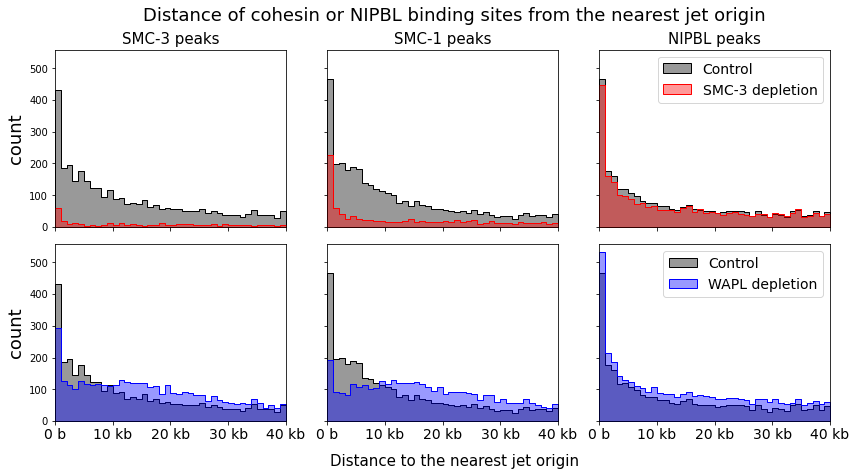

In [6]:
### n peaks, center
f, axs = plt.subplots(
    figsize=(12, 6),
    nrows=2,
    ncols=3,
    sharey=True,
    sharex=True
)


#Label_1 = 'Control'
#Label_2 = 'SMC-3 depletion'
Labels = ['Control','SMC-3 depletion','WAPL depletion']
Titles = ['SMC-3 peaks', 'SMC-1 peaks', 'NIPBL peaks']
Maxd = 40_000

for i in range(3):
    t = bioframe.closest(ctr[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[0],
                 stat = "count",color='black',alpha=0.4,binwidth=1000,element='step')
    t = bioframe.closest(jk05[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[1],
                 stat = "count",color='red',alpha=0.4,binwidth=1000,element='step')
    a.set_ylabel('count' ,rotation=90,fontsize=18,labelpad=4)
    a.set_title(Titles[i],fontsize=15)
    if i == 2:
        a.legend(prop={'size': 14})
    
for i in range(3):
    t = bioframe.closest(ctr[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[0],
                 stat = "count",color='black',alpha=0.4,binwidth=1000,element='step')
    t = bioframe.closest(jk06[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[2],
                 stat = "count",color='blue',alpha=0.4,binwidth=1000,element='step')
    a.set_ylabel('count' ,rotation=90,fontsize=18,labelpad=4)
    if i == 2:
        a.legend(prop={'size': 14})
    
    
    a.set_xlabel('')
    format_ticks(a,x=True,y=False,rotate=False)
    a.set_xlim(0,40_000)
    a.xaxis.set_tick_params(labelsize=14)


    
f.text(0.53,1,'Distance of cohesin or NIPBL binding sites from the nearest jet origin',fontsize=18, ha='center')

f.text(0.53, -0.03, 'Distance to the nearest jet origin', 
       ha='center',fontsize=15)

plt.tight_layout()    